# OpenCV thresholding, convolutions, blurring, sharpening

In this notebook we apply thresholding, binarization, blurring and sharpening to images.

## Imports
Includes our own libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image

## Download images
You might be able to skip this if you already have the images from a previous run...

In [3]:
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz -P ./tmp/
# !tar -xf ./tmp/wiki.tar.gz -C ./tmp/

## Thresholding
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

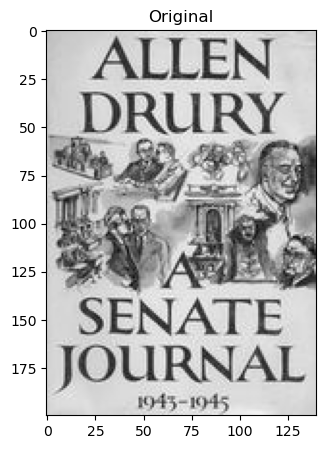

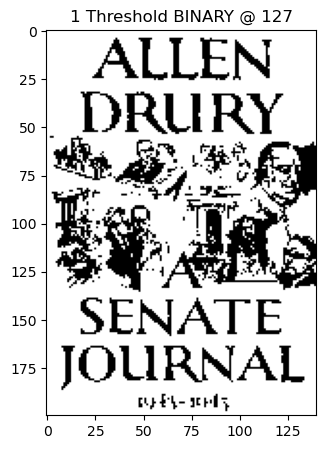

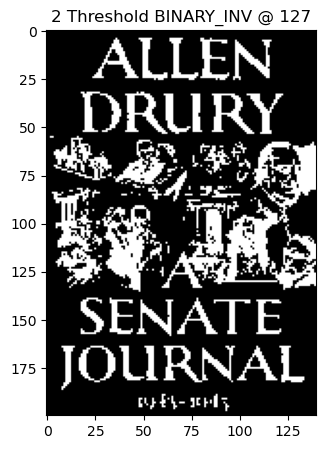

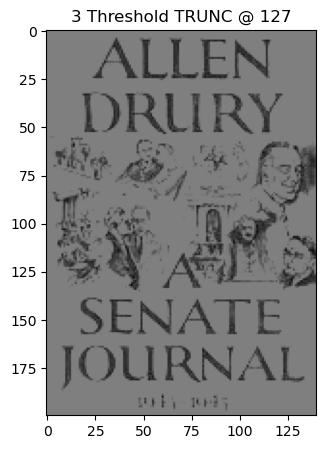

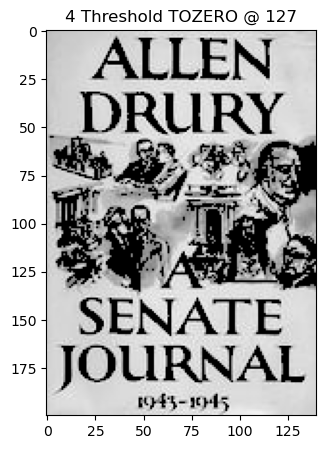

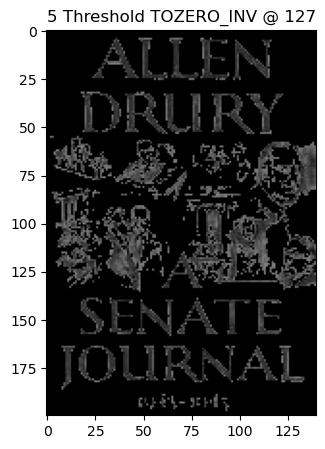

In [4]:
# Load our image as greyscale 
img = cv2.imread('tmp/wiki/19/744619_1918-09-02_1963.jpg', 0)
show_image(img, "Original")

# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_image(thresh1, '1 Threshold BINARY @ 127')

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
show_image(thresh2, '2 Threshold BINARY_INV @ 127')

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
show_image(thresh3, '3 Threshold TRUNC @ 127')

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
show_image(thresh4, '4 Threshold TOZERO @ 127')

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
show_image(thresh5, '5 Threshold TOZERO_INV @ 127')

## Adaptive thresholding
`cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])`

* **src**: source image 8bit single channel
* **dst**: destination image
* **maxValue**: value to set pixels to which satisfy the condition
* **adaptiveMethod**: `ADAPTIVE_THRESH_MEAN_C` or `ADAPTIVE_THRESH_GAUSSIAN_C`
* **thresholdType**: `THRESH_BINARY` or `THRESH_BINARY_INV`
* **blockSize**: Size of the neighboring pixels used to calculate threshold value (3, 5, 7, ...)
* **C**: Constant subtracted from the mean.

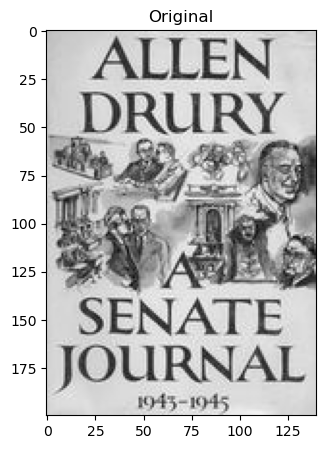

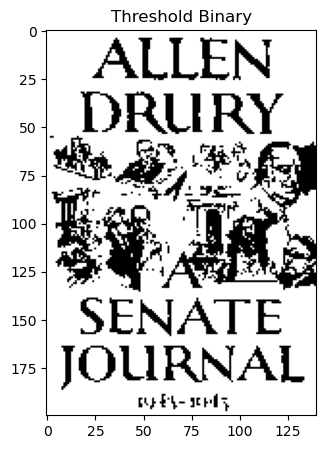

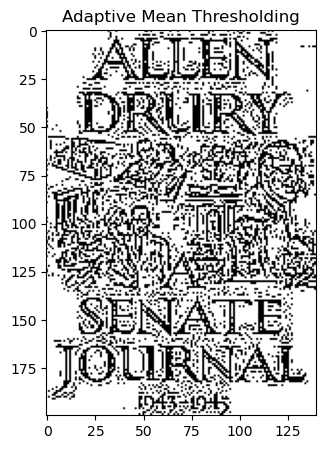

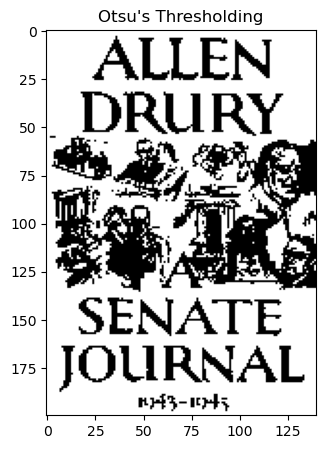

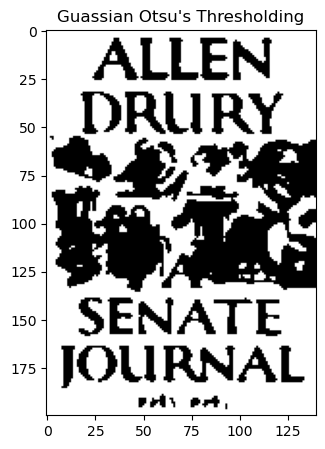

In [5]:
show_image(img, "Original")

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_image(thresh_1, 'Threshold Binary')

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
show_image(thresh, "Adaptive Mean Thresholding") 

_, thresh_2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(thresh_2, "Otsu's Thresholding") 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img, (5,5), 0)
_, thresh_3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(thresh_3, "Guassian Otsu's Thresholding") 

## Good alternative: skimage local threshold
https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

`threshold_local(image, block_size, offset=10)`

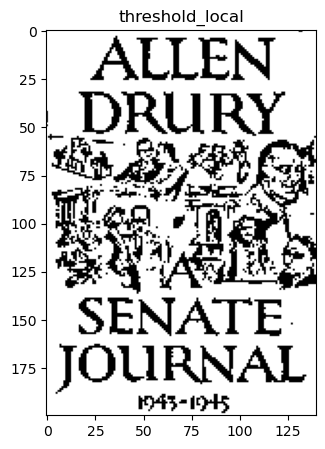

In [6]:
from skimage.filters import threshold_local

img = cv2.imread('tmp/wiki/19/744619_1918-09-02_1963.jpg')

# get the value from the HSV color space, then apply adaptive thresholding
value = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(value, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (value > T).astype("uint8") * 255
show_image(thresh, "threshold_local")

## Convolutions, Blurring and Sharpening
By using [filter kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing)), we can modify images in many ways, such as blurring, sharpening, edge detection, etc...  
We can apply convolution filters by using `cv2.filter2D(image, depth, kernel)`.

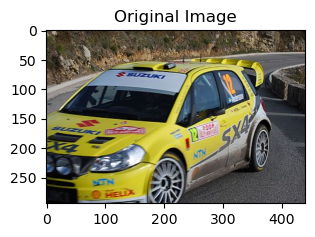

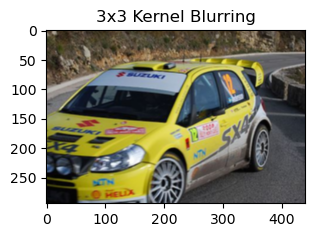

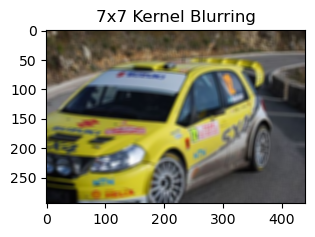

In [10]:
img = cv2.imread('tmp/wiki/04/11720204_1980-03-10_2008.jpg')
show_image(img, 'Original Image')

kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(img, -1, kernel_3x3)
show_image(blurred, '3x3 Kernel Blurring')

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred_2 = cv2.filter2D(img, -1, kernel_7x7)
show_image(blurred_2, '7x7 Kernel Blurring')

We can also use other blurring methods provided by OpenCV:
- Regular Blurring (Averaging)
- Gaussian Blurring
- Median Blurring
- Bilateral Filter

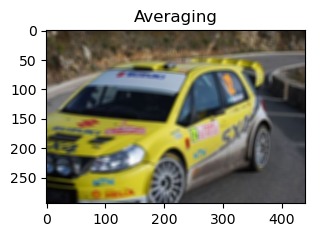

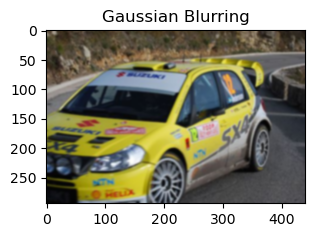

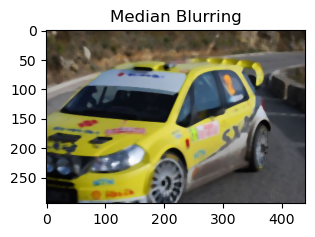

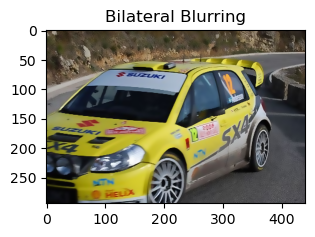

In [19]:
# Averaging done by convolving the image with a normalized box filter. 
# takes the pixels under the box and replaces the central element
# box size needs to odd and positive 
blur = cv2.blur(img, (7,7))
show_image(blur, 'Averaging')

# Instead of box filter, gaussian kernel
gaussian = cv2.GaussianBlur(img, (7,7), 0)
show_image(gaussian, 'Gaussian Blurring')

# Takes median of all the pixels under kernel area and central element is replaced with this median value
median = cv2.medianBlur(img, 7)
show_image(median,'Median Blurring')

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
show_image(bilateral, 'Bilateral Blurring')

## De-noising
There are multiple variations of non-local means denoising;
* `cv2.fastNlMeansDenoising()` - single grayscale images 
* `cv2.fastNlMeansDenoisingColored()` - colored images 
* `cv2.fastNlMeansDenoisingMulti()` - image sequence captured in short period of time (grayscale images)  
* `cv2.fastNlMeansDenoisingColoredMulti()` - image sequence of color images

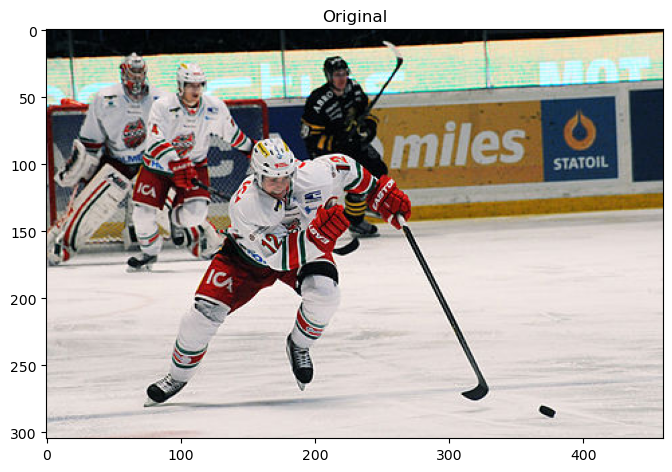

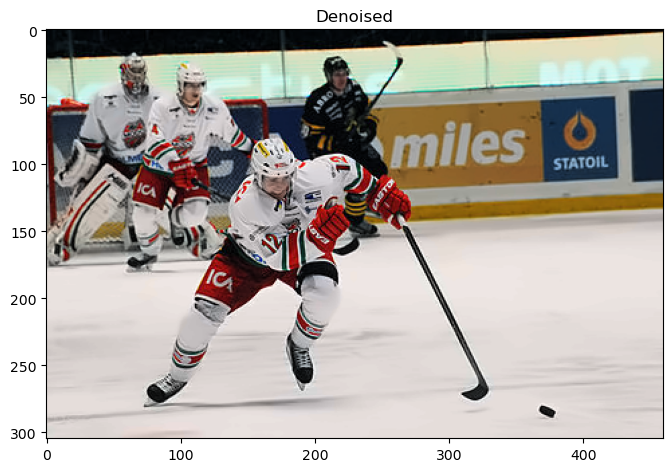

In [29]:
img = cv2.imread('tmp/wiki/16/28982216_1983-06-05_2013.jpg')
show_image(img, 'Original', 12)

denoised = cv2.fastNlMeansDenoisingColored(img, None, 3, 6, 7, 21)
show_image(denoised, 'Denoised', 12)

## Sharpening

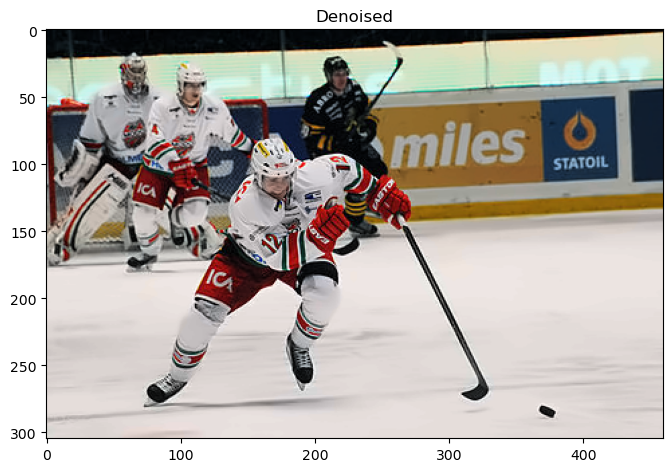

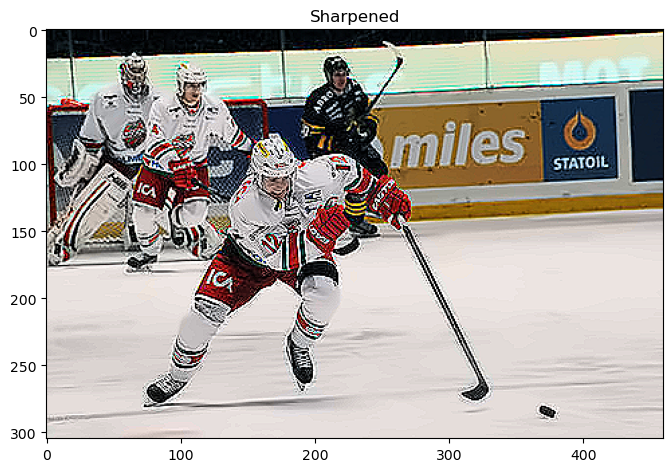

In [31]:
show_image(denoised, 'Denoised', 12)

# sharpening kernel, it must sum to one to preserve the brightness
kernel_sharpening = np.array([[0,-1,0], 
                              [-1,5,-1],
                              [0,-1,0]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(denoised, -1, kernel_sharpening)
show_image(sharpened, 'Sharpened', 12)